## Simple Linear Regression

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df=pd.read_csv('weight_height_data.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


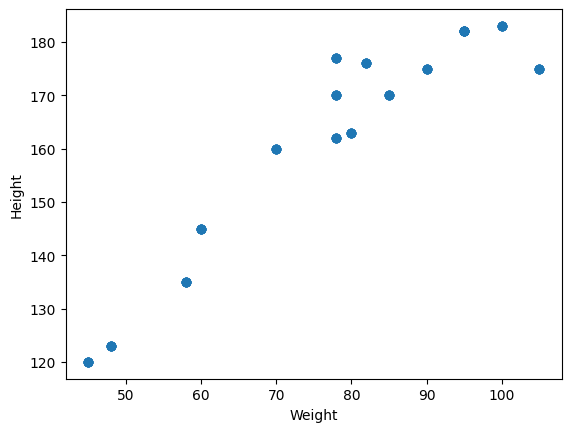

In [7]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()


In [8]:
## Co-relation
df.corr()

,Weight,Height
Weight,1.000000,0.939461
Height,0.939461,1.000000


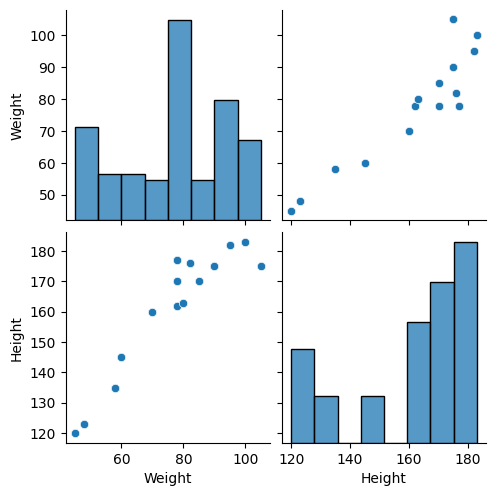

In [9]:
#Seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()


In [10]:
## Independent and Dependent Features
X = df[['Weight']]     ## Should be Always a DataFrame or 2D Array
Y = df['Height']        ##This variable can be in series or 2d Array


In [11]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
...,...
95,78
96,45
97,58
98,48


In [12]:
Y

0     120
1     135
2     123
3     145
4     160
     ... 
95    177
96    120
97    135
98    123
99    145
Name: Height, Length: 100, dtype: int64

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [15]:
## Standardization
from sklearn.preprocessing import StandardScaler


In [17]:
scaler=StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.11940144],
       [ 1.08292568],
       [-1.75096916],
       [ 0.11940144],
       [ 1.08292568],
       [ 1.08292568],
       [ 0.11940144],
       [ 0.11940144],
       [ 1.64970465],
       [ 1.36631516],
       [ 0.11940144],
       [-1.58093547],
       [-1.0141565 ],
       [-0.90080071],
       [-1.75096916],
       [-1.0141565 ],
       [-1.58093547],
       [ 0.7995362 ],
       [ 0.11940144],
       [ 1.08292568],
       [-0.90080071],
       [-1.0141565 ],
       [ 0.11940144],
       [ 0.51614671],
       [ 1.36631516],
       [ 1.08292568],
       [-0.90080071],
       [-1.0141565 ],
       [ 0.23275723],
       [ 1.08292568],
       [ 0.51614671],
       [ 0.23275723],
       [-1.75096916],
       [-0.33402174],
       [ 0.11940144],
       [ 1.08292568],
       [-0.90080071],
       [ 0.23275723],
       [ 1.08292568],
       [-1.58093547],
       [-0.90080071],
       [ 0.51614671],
       [-0.33402174],
       [ 1.36631516],
       [-1.0141565 ],
       [ 0

In [18]:
X_test=scaler.transform(X_test)


In [20]:
X_test

array([[-0.90080071],
       [ 0.11940144],
       [ 0.23275723],
       [ 1.36631516],
       [ 1.64970465],
       [ 0.7995362 ],
       [ 0.23275723],
       [-1.75096916],
       [ 0.34611302],
       [-1.75096916],
       [-1.58093547],
       [ 0.51614671],
       [ 0.11940144],
       [-1.0141565 ],
       [ 0.34611302],
       [-0.33402174],
       [ 1.64970465],
       [ 1.36631516],
       [ 1.64970465],
       [ 0.11940144],
       [ 0.7995362 ],
       [ 1.08292568],
       [ 0.34611302],
       [ 0.34611302],
       [ 0.11940144]])

In [22]:
## Applying Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
regression=